# General remarks

Work through the problems and fill in any place where it says `YOUR CODE HERE` or "YOUR ANSWER HERE".

Once you have filled in a code cell with your solution to the problem, remove the `raise NotImplementedError()` statement.
But if you did not work on a particular problem or didn't come up with a solution, leave that statement in place.

Before you hand in your assignment on Canvas, make sure everything runs as expected.

> The easiest way to check this is to **restart the kernel and run all cells** 
> (in the menubar, select *Kernel$\rightarrow$Restart Kernel and Run All Cells...*) 

And, please, fill in your name(s) and group number in the cell below:

In [6]:
NAMES = "Jonathan Nguyen och Carl Örnberg"                # fill in your name(s) between the quotes, comma separated if more than one
GROUP = "23"                # fill in your group number between the quotes

---

# Problem 1 - Publication Quality Graphics

We are going to reproduce a plot presented [here](https://blogs.mathworks.com/loren/2007/12/11/making-pretty-graphs/).

**There is, however, no need to follow that link**, because we want to do the same thing in Python, which they did in MatLab. 

*The MatLab code won't help you much!*

## The data

The data are read from the same MatLab mat-file (`data.mat`) that they used, which you should have downloaded from Canvas and put in the same folder as this notebook. 

Just run the following cell to create the variables which we'll need for our plot.

In [7]:
# just run this cell

import os
import scipy.io

def extract(var, mat):
    return mat[var].flatten()

assert os.path.exists("data.mat")
mat = scipy.io.loadmat("data.mat")

xfit = extract("xfit", mat)
yfit = extract("yfit", mat)

xdata_m = extract("xdata_m", mat)
ydata_m = extract("ydata_m", mat)
ydata_s = extract("ydata_s", mat)

xVdata = extract("xVdata", mat)
yVdata = extract("yVdata", mat)

xmodel = extract("xmodel", mat)
ymodel = extract("ymodel", mat)
ymodelL = extract("ymodelL", mat)
ymodelU = extract("ymodelU", mat)

## Basic plot

Let's produce a first, very basic plot of the data. 
Study the code and try to understand what it is doing. Read the comments.

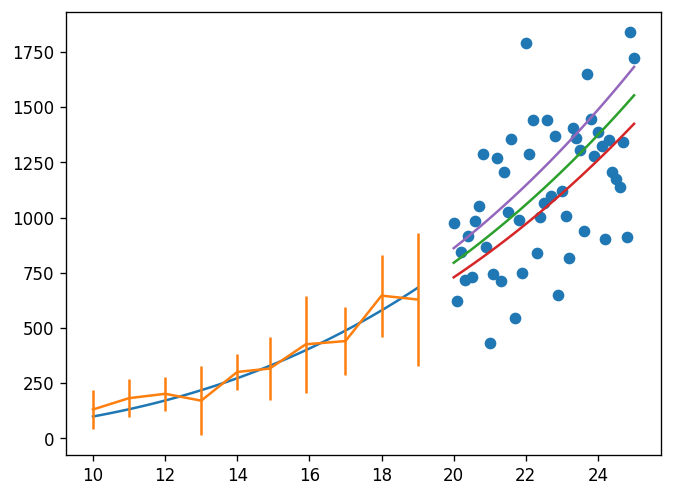

In [8]:
# just run this cell

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator     # we will need this later for generating custom minor and major ticks

fig, ax = plt.subplots(dpi=120)

# plot variable yfit against xfit
plt.plot(xfit, yfit)

# plot ydata_m against xdata_m, with error bars given by ydata_s 
plt.errorbar(xdata_m, ydata_m, ydata_s)

# produce a scatter plot of yVdata vs xVdata
plt.scatter(xVdata, yVdata)

# plot the model and lower and upper confidence levels
plt.plot(xmodel, ymodel)     # the model itself
plt.plot(xmodel, ymodelL)    # the lower (L) confidence level
plt.plot(xmodel, ymodelU)    # the upper (U) confidence level

plt.show()

## Quality plot

Now turn this into the following plot (which is basically the result they achieved with Matlab):

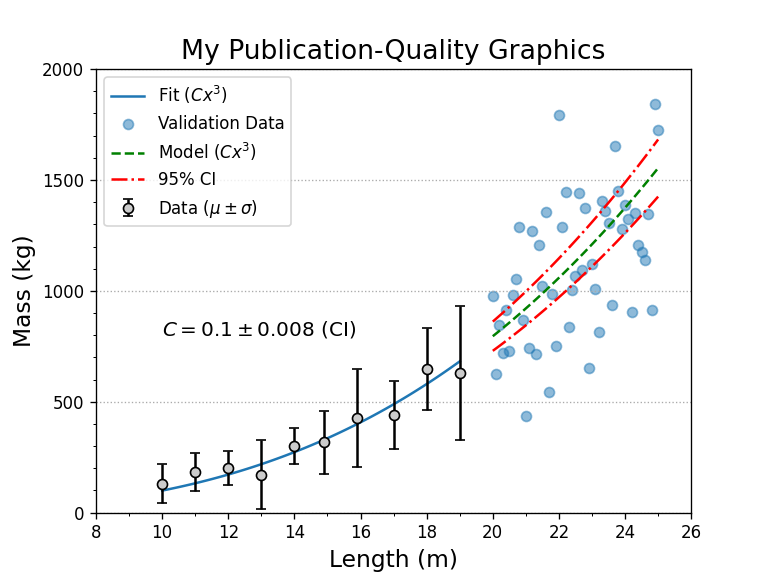

**In particular, you are asked to:**

* Change the limits on the x-axis to $8\ldots 26$
* Change the limits on the y-axis to $0\ldots 2000$
* Add a label on the x-axis: "Length (m)"
* Add a label on the y-axis: "Mass (kg)"
* Add a title: "My Publication-Quality Graphics"
* Add the necessary parameters of the call to `errorbar` to make it look as required (see Hint 2 below).
* Make the markers of the scatter plot 50% transparent.
* Change the plots of the model and its confidence interval, so that you get the required line styles and colors.
* Produce the required major and minor ticks.
* Produce a grid with grey, dotted horizontal lines at the major tick marks.
* Produce the legend shown.
* Annotate at position (10, 800) with text: "$C = 0.1 \pm 0.008$ (CI)"

> Hint 1: You can start by copying the code from the cell above,
> and then the solution can be achieved by just adding more code.
> I suggest you add code for one item in the bullet list at a time and run the cell 
> again each time to check your progress.
> 
> Hint 2: For the error bar plot look at parameters `fmt`, `capsize`, `color`, `markeredgecolor`
> and `markerfacecolor`
>
> Hint 3: The technique to get custom major and minor ticks is decsribed
> [here](https://matplotlib.org/3.4.3/gallery/ticks_and_spines/major_minor_demo.html).
> We have already imported the necessary class `MultipleLocator` above!

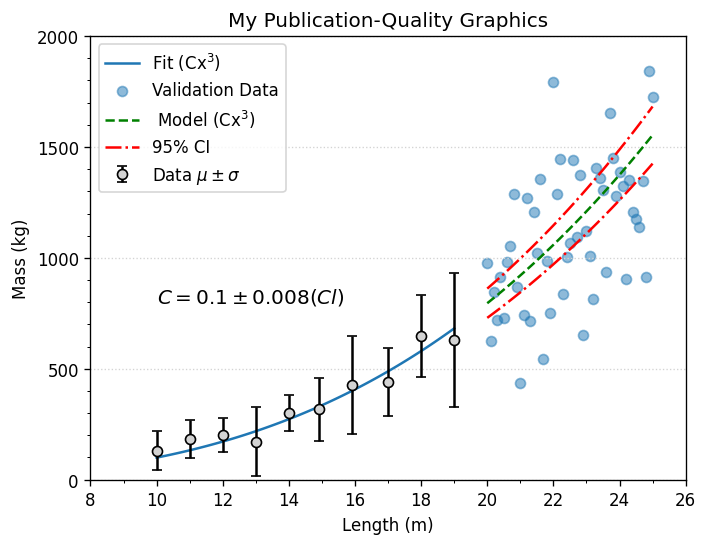

In [9]:
# YOUR CODE HERE

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator     # we will need this later for generating custom minor and major ticks

fig, ax = plt.subplots(dpi=120)

# plot variable yfit against xfit
plt.plot(xfit, yfit, label="Fit (Cx$^3$)")

# plot ydata_m against xdata_m, with error bars given by ydata_s 
plt.errorbar(xdata_m, ydata_m, ydata_s, fmt="o", capsize=3, color="black", markeredgecolor="black", markerfacecolor="lightgrey", label=(r"Data $\mu \pm \sigma$"))

# produce a scatter plot of yVdata vs xVdata
plt.scatter(xVdata, yVdata, alpha=0.5, label="Validation Data")

# plot the model and lower and upper confidence levels
plt.plot(xmodel, ymodel, color="green", linestyle="dashed", label=(r" Model (Cx$^3$)"))     # the model itself
plt.plot(xmodel, ymodelL, color="red", linestyle="dashdot", label="95% CI")     # the lower (L) confidence level
plt.plot(xmodel, ymodelU, color="red", linestyle="dashdot")    # the upper (U) confidence level

ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(500))
ax.yaxis.set_minor_locator(MultipleLocator(100))
ax.grid(linestyle=":", color="lightgrey", axis="y")

plt.legend()
plt.text(10, 800, (r"$C = 0.1 \pm 0.008 (Cl)$"), fontsize=12)



plt.xlim(8, 26)
plt.ylim(0, 2000)
plt.xlabel("Length (m)")
plt.ylabel("Mass (kg)")
plt.title("My Publication-Quality Graphics")



plt.show()


# Problem 2 - Logarithmic plot of a power law

The data given below describe two temperature profiles (stored in variables `T_1`  and `T_2`) 
in the gas shell around a dying star as a function of radius (`R`). 

Following astronomical convention, the radius is given in centimeters and the temperatures in degrees Kelvin.

## The data

In [10]:
# just run this cell

import numpy as np
import matplotlib.pyplot as plt

# Here we give the raw data with x (radius in cm), y1 (temperature 1 in K), y2 (temperature 2 in K)
R = np.array([1.00000000e+13, 1.25892541e+13, 1.58489319e+13, 1.99526231e+13, 2.51188643e+13, 3.16227766e+13, 3.98107171e+13,
              5.01187234e+13, 6.30957344e+13, 7.94328235e+13, 1.00000000e+14, 1.25892541e+14, 1.58489319e+14, 1.99526231e+14,
              2.51188643e+14, 3.16227766e+14, 3.98107171e+14, 5.01187234e+14, 6.30957344e+14, 7.94328235e+14, 1.00000000e+15,
              1.25892541e+15, 1.58489319e+15, 1.99526231e+15, 2.51188643e+15, 3.16227766e+15, 3.98107171e+15, 5.01187234e+15,
              6.30957344e+15, 7.94328235e+15, 1.00000000e+16, 1.25892541e+16, 1.58489319e+16, 1.99526231e+16, 2.51188643e+16,
              3.16227766e+16,3.98107171e+16,5.01187234e+16,6.30957344e+16,7.94328235e+16])
T_1 = np.array([2500.0, 2228.12734533, 1985.82058681, 1769.86446096, 1577.3933612, 1405.85331298, 1252.96808407, 1116.70898038, 
                995.26792638, 887.03347308, 790.56941504, 704.59573282, 627.97160788, 559.68028464, 498.81557874, 444.56985251, 
                396.22329812, 353.13438616, 314.73135295, 280.50461358, 250.0, 222.81273453, 198.58205868, 176.9864461, 157.73933612,
                140.5853313, 125.29680841, 111.67089804, 99.52679264, 88.70334731, 79.0569415, 70.45957328, 62.79716079, 55.96802846,
                49.88155787, 44.45698525, 39.62232981, 35.31343862, 31.47313529, 28.05046136])
T_2 = np.array([1300.0, 1185.61409116, 1081.29290243, 986.15084754, 899.38026219, 820.24454782, 748.07191854, 682.24969832, 622.21912002,
                567.47058191, 517.53932172, 472.0014712, 430.47045793, 392.59372365, 358.04973143, 326.5452361, 297.81279486, 271.60849701,
                247.70989334, 225.91410774, 206.03611502, 187.9071702, 171.37337601, 156.2943765, 142.5421655, 130.0,  118.56140912, 
                108.12929024, 98.61508475, 89.93802622, 82.02445478, 74.80719185, 68.22496983, 62.221912, 56.74705819, 51.75393217,
                47.20014712, 43.04704579, 39.25937237, 35.80497314])

## Initial figure

Let's plot the data.

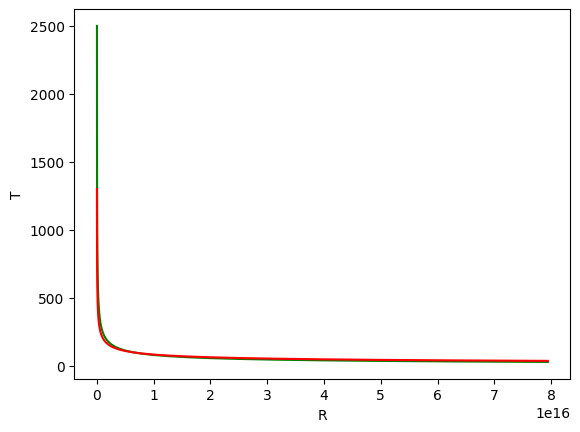

In [11]:
# just run this cell

plt.plot(R, T_1, color='green')
plt.plot(R, T_2, color='red')
plt.xlabel('R')
plt.ylabel('T')
plt.show()

## Problems with the figure

There are a number of problems with this plot:

* It is difficult to distinguish the two profiles.
* Red and green colors are a bad choice for color blind people.
* The plot has no title, the axes labels do not reveal the units. 

Notice that the radius covers almost 4 orders of magnitude, from $10^{13} \ldots 10^{17}$ cm.
Also, it turns out that the two profiles are actually based on power laws, i.e. a relation of the form 
$$T \propto R^\beta$$ 
**Both of these facts strongly suggest that we should be using at least a logarithmic x-axis!**

Before we change our plot, we want to determine the $\beta$'s for the two profiles, 
so that we can label the curves accordingly.

> You may use `np.polyfit()` to fit a polynomial of a given degree to data.
> A degree of 1 will return a linear fit, i.e. you get the slope and intercept of the relation between the data.
>
> For a power law we have such a linear relation between the logarithms of the data,
> here: $\log T = \beta \log R + C$, so we will only use the first coefficient (the slope) returned by `np.polyfit`, which will be our $\beta$.
> 
> Do this for both profiles, resulting in two different values, $\beta_1$ and $\beta_2$. 

In [12]:
# fit a linear polynomial to the logs of R and T_1 and get the slope, store it in `beta_1`
# fit a linear polynomial to the logs of R and T_2 and get the slope, store it in `beta_2`

beta_1 = np.polyfit(np.log(R), np.log(T_1), 1)[0]
beta_2 = np.polyfit(np.log(R), np.log(T_2), 1)[0]


print(f"Beta1: {beta_1}")
print(f"Beta2: {beta_2}")
# YOUR CODE HERE


Beta1: -0.49999999997652317
Beta2: -0.3999999999828012


## Improved figure

Now, produce a new plot. This is what you should change compared to the initial figure:

* Use logarithmic axes **for both** `R` and `T` (*Hint: use `plt.loglog` to plot the data*).
* Do not use red and green colors, and change the line style of one of the profiles
  to make them differ.
* Label the profiles with text of the form $\beta = \ldots$,
  the actual value of $\beta$ should be given with one decimal.
* Give the plot a title.
* Add units to the axes labels.

<function matplotlib.pyplot.show(close=None, block=None)>

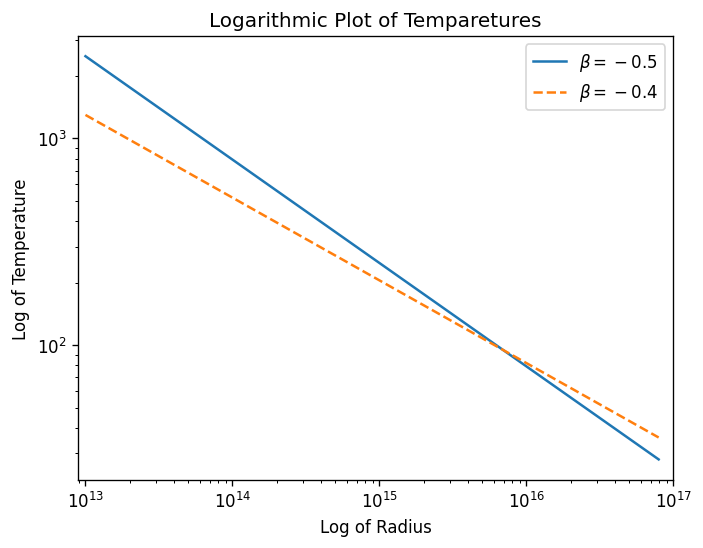

In [13]:
# YOUR CODE HERE
fig, ax = plt.subplots(dpi=120)

ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(50))
ax.yaxis.set_minor_locator(MultipleLocator(50))

plt.xlim(12**12, 10**17)


plt.loglog(R, T_1, label=(r"$\beta = -0.5$"))
plt.loglog(R, T_2, linestyle="dashed", label=(r"$\beta = -0.4$"))
plt.title("Logarithmic Plot of Temparetures")
plt.xlabel("Log of Radius")
plt.ylabel("Log of Temperature")

plt.legend()
plt.show



# Problem 3 - The central limit theorem

In this problem we will simulate the tossing of a coin.

Write a function `coin_tosses` that performs $N$ simulations of a coin toss.

To do this we use uniform random numbers (using `random.random()`) and count the outcome as *head* when the number is smaller than 0.5,
and as *tail* otherwise.

We then calculate the sum of the $N$ tosses, where we count each occurrence of *head* as $+1$ and each occurrence of *tail* as $-1$.
With an even number of tosses, this sum will also be even. Our method below will divide by 2 before returning the result.

> According to the [central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) we expect that the distribution of these sums will
> approach the **standard normal distribution**. 


In [14]:
import random

def coin_tosses(N):
   """Simulate tosses of a coin.

   Use uniform random numbers to simulate N tosses of a fair coin.
   Count 'heads' (the random number is smaller than 0.5) as +1,
   and count 'tails' as -1.

   Args:
      N (int) number of tosses to perform, should be even.

   Returns:
      (int) the sum of all tosses divided by 2.
   """
   assert N % 2 == 0     # make sure input parameter N is even.
   total = 0
   for i in range(N):
      if random.random() < 0.5:
        total += 1
      else:
         total -= 1
   return total/2
      
    
# YOUR CODE HERE




Now write a function `experiment`, that performs $M$ calls to our function `coin_tosses`.
* The outcome of the $M$ calls will be $M$ numbers in the range $N/2\ldots N/2$.
* Plot these as a histogram, the histogram bins should be centered at the whole numbers $N/2\ldots N/2$. 
* Calculate the standard variation of the $M$ outcomes.
* Plot a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) on top of the histogram.
  Generate a vector $x$ which covers the range of the histogram and then use
  $$f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$  
  for the distribution. Use the standard deviation from the previous step as $\sigma$ and $\mu = 0$.
* Label both the histogram and the normal distribution and add a legend to the plot.
  
> Use parameter `density=True` for the histogram!

In [15]:
# YOUR CODE HERE
    
def experiment(M, N):
    data = np.array(np.zeros(M))

    #Put all data in an array
    for i in range(M):
        data[i] = coin_tosses(N)
     
    #amount of bins
    unique = len(np.unique(data))
    bin = np.linspace(np.min(data) + 0.5, np.max(data) + 1.5, unique)

    #standard deviation
    std = np.std(data)

    # Min and Max Value of the Data
    min = abs(np.min(data))
    max = np.max(data)
    if min > max:
        min = -1*min
        max = min
    min = -1*max


    vector = np.linspace(min, max, np.size(data))
    
    #Gaussian
    mean = 0
    gaussian = 1.0/(std*np.sqrt(2.0*np.pi))*np.exp(-0.5*((vector-mean)/std)**2)
    
    #number of ticks

    #Plotting the values
    plt.hist(data, density = True, bins = bin, edgecolor ='black') 
    plt.plot(vector , gaussian, color='red')
    plt.xlim(min, max)
    plt.show()







    
    



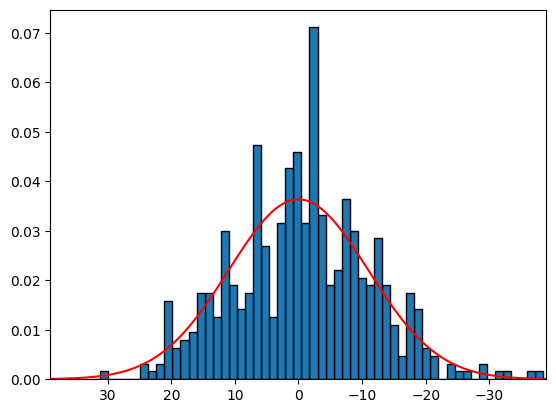

In [16]:
# Perform an experiment, compare for example experiment(10,10) with experiment(1000,100)
# First run this cell a numerb of times by using <Ctrl><Return>, then do the same with the larger numbers for M and N.

# experiment(10, 10)
experiment(500, 500)

# Problem 4 - Simulate the outcome of a COVID test

We are simulating a situation where we test a group of people for COVID, from a population where half of the people are believed to be sick.

So prior to the test the chance of being sick is 50%. What is the probability of being sick

* after the test, if the outcome of a COVID test was **positive**?
* after the test, if the outcome of a COVID test was **negative**?

> *From the web:* SARS-CoV-2 antigen tests have an average sensitivity
> of 69.3% and specificity of 98.3%.
>
> Note these values are just an example that I found, you can find different numbers as well.

## Simulation

Import the necessary modules and define our probabilities.

In [17]:
# just run this cell

import random
from matplotlib import pyplot as plt

probability = 0.5           # the probability of being sick before testing
sensitivity = 0.693         # 69.3% of sick people will test positive (i.e. 30.7% false negatives)
specificity = 0.983         # 1.7% (100% - 98.3%) of healthy people will test positive (so called false positives)

Write a function called `get_case`, which takes **no parameter** and does the following:

* Generate two uniform, random variables `r1`  and `r2` (using `random.random()`).
* Initialize two boolean variables, `sick` and `positive` both to `False`.
* If `r1` is smaller than our prior probability of being sick, set variable `sick` to `True`.
* Then, if `sick` is `True` and `r2` is lower than the sensitivity of the antigen test,
  set `positive` to `True`.
* Or, if `sick` is `False` and `r2` is lower than 1 minus the specificity of the test,
  set `positive` to `True`.
* **return** the tuple (`sick`, `positive`) (already filled in).

In [18]:
def get_case():
    # YOUR CODE HERE
    """Uses random numbers to produce one outcome of (sick, positive)."""
    r1 = random.random()
    r2 = random.random()
    sick = False
    positive = False
    if r1 < probability:
        sick = True
    if (sick == True and r2 < sensitivity) or (sick == False and r2 < (1-specificity)):
        positive = True    
    return (sick, positive)



* Perform 1000 tests, i.e. call function `get_case` 1000 times. 
* Keep track of how many resulted in `(False, False)`, `(True, False)`, `(False, True)` and `(True, True)`.
* Produce the following output:
```
prior probability of having COVID = 0.50
posterior probability of having COVID = 0.??, having tested positive
posterior probability of having COVID = 0.??, having tested negative
```

* where the posterior probability of having COVID when tested positive is the number of tests resulting in
  `(True, True)` divided by the sum of `(True, True)` and `(False, True)`.
* and the posterior probability of having COVID when tested negative is the number of tests resulting in
  `(True, False)` divided by the sum of `(True, False)` and `(False, False)`.
* In the output the posterior probabilities should be printed with two decimals.  

In [19]:
# YOUR CODE HERE
FFcounter = 0
TFcounter = 0
FTcounter = 0
TTcounter = 0
for i in range (1000):
    a = get_case()
    
    if a ==(True, True):
        TTcounter+=1

    if a == (False, False):
        FFcounter +=1
        
    if a == (True, False):
        TFcounter +=1
        
    if a ==(False, True):
        FTcounter+=1

    
PosteriorProbabilityPositive = TTcounter/(TTcounter + FTcounter)
PosteriorProbabilityNegative = TFcounter/ (TFcounter + FFcounter)
print( f"Posterior Probability Positive {PosteriorProbabilityPositive:.2f}")
print( f"Posterior Probability Negative {PosteriorProbabilityNegative:.2f}")


    


    


Posterior Probability Positive 0.99
Posterior Probability Negative 0.22


## Bar chart

Produce a bar chart of the simulation results of the 4 different outcomes. Your x-axis should have the following four labels:

```
healthy     sick        healthy     sick
negative    negative    positive    positive
```

> *Hint*: put line feeds into strings to make them break up into two lines.

Your plot should look like the image below, with given title and x-axis labels.

> *Obviously your numbers may slightly differ as we are using random numbers!*

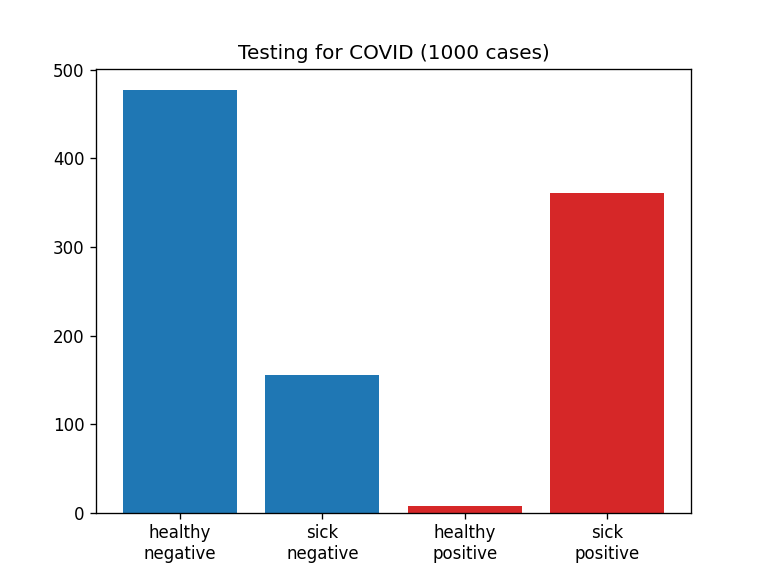


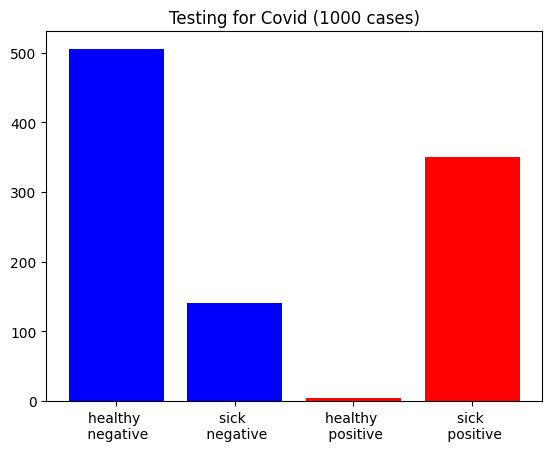

In [20]:
# YOUR CODE HERE
ydata = np.array([FFcounter, TFcounter, FTcounter, TTcounter])
xdata = np.array(["healthy \n negative", "sick \n negative", "healthy \n positive", "sick \n positive"])
plt.bar(xdata, ydata, color = ["blue","blue","red","red"])
plt.title("Testing for Covid (1000 cases)")
plt.show()



# Problem 5 - Planetary orbits

We will plot the orbits of the plantets in the solar system and view them along the three spatial axes, 
i.e in the form of an `x-y`, `x-z` and `y-z` plot.

## Orbital elements

Below you are given a dictionary, which contains a list of orbital (elliptical) elements for each planet. 

For those who are interested (but not required knowledge to solve this problem), these elements are:
* $a$ is the semi-major axis of the orbit in astronomical units astronomical units. This will be 1.0 by definition for the Earth.
* $e$ the eccentricity of the orbit, between $0\ldots 1$, the higher the value the more elliptical is the orbit.
* $i$ the inclination of the orbit, i.e. the angle between the planet's orbit and the plane of the Earth, in degrees.
* $\omega$ is the longitude of perihelion and defines the orientation of the ellipse in the orbital plane, in degrees.
* $\Omega$ is the longitude of the ascending node, in degrees.
* $P$ is the orbital period in units of years, again this is 1.0 for the Earth by definition.

In [21]:
# just run this cell
import numpy as np
from matplotlib import pyplot as plt

#                name: [a, e, incl, peri, node, period]
orb_elements = {'Mercury': [0.3871, 0.20564, 7.006, 77.46, 48.34, 0.241],
                'Venus': [0.7233, 0.00676, 3.398, 131.77, 76.67, 0.615],
                'Earth': [1.0, 0.01673, 0.0, 102.93, 0.0, 1.0],
                'Mars': [1.5237, 0.09337, 1.852, 336.08, 49.71, 1.881],
                'Jupiter': [5.2025, 0.04854, 1.299, 14.27, 100.29, 11.87],
                'Saturn': [9.5415, 0.05551, 2.492, 92.86, 113.64, 29.47],
                'Uranus': [19.188, 0.04689, 0.773, 172.43, 73.96, 84.05],
                'Neptune': [30.070, 0.00895, 1.770, 46.68, 131.79, 164.9],
                'Pluto': [39.4821, 0.24883, 17.14, 113.76, 110.30, 247.94]} 

## Conversion to Cartesian coordinates

The following block of code may be used as "black box" to convert from orbital elements to cartesian coordinates 
$x$, $y$ and $z$ in the Solar system. 

**Note, that only the first five elements of the orbital parameters of a planet are used, the period is not used.**

The last parameter E is known as the eccentric anomaly, which is an angle (in radians) which specifies where in the orbit we are,
if should be specified as a single value or as a `numpy` vector for a range of values. 
*Varying E from 0 to $2\pi$ takes the planet around a full orbit.*

In [22]:
# just run this cell

def orbitalElements2Cartesian(a, e, incl, peri, node, E):
    """ Convert orbital elements to Cartesian coordinates in the Solar System.

    If the accentric anomaly (E) is passed as a vector, then the returned x, y and z will
    also be vectors of the same shape as E.
    
    Args: 
        a (float): semi-major axis (AU)
        e (float): eccentricity
        incl (float): incl (degrees)
        peri (float): longitude of perihelion (degrees)
        node (float): longitude of ascending node (degrees)
        E (float): eccentric anomaly (radians); this can be an array or single value

    Returns:
        (float, float, float) a tuple of x, y and z -values 
    """

    # The source of the equations used:
    # http://farside.ph.utexas.edu/teaching/celestial/Celestialhtml/node34.html
        
    # Convert degrees to radians (using the map function, but you could have simply used (np.pi * angle/180.).
    incl, peri, node = map(np.radians, [incl, peri, node])

    # True anomaly (caculated from E and the eccentricity. Notice that for a circular orbit [e=0] theta and E are identical.
    theta = 2*np.arctan(np.sqrt((1.0 + e)/(1.0 - e))*np.tan(E/2.0))

    # Distance from the Sun to the point on orbit (notice again that for e=0, this is a circle with radius a)
    r = a*(1.0 - e*np.cos(E))

    # Cartesian coordinates
    x = r*(np.cos(node)*np.cos(peri + theta) - np.sin(node)*np.sin(peri + theta)*np.cos(incl))
    y = r*(np.sin(node)*np.cos(peri + theta) + np.cos(node)*np.sin(peri + theta)*np.cos(incl))
    z = r*np.sin(peri + theta)*np.sin(incl)

    return x, y, z



In [23]:
# just run this cell
# This is just a test case: 
# for Earth, get x, y, z at two positions E = 0.0 and pi

a, e, incl, peri, node, period = orb_elements['Earth']
E = np.array([0.0, np.pi])
      #
x, y, z = orbitalElements2Cartesian(a, e, incl, peri, node, E)   # note, we are not using period!
print(f"x = {x}, y = {y}, z = {z}")



x = [-0.22001696  0.22750398], y = [ 0.95833837 -0.99094996], z = [ 0. -0.]


## Producing subplots

Now, produce three plots, arranged in a $2\times 2$ matrix (i.e. use `fig, axs = plt.subplots(2, 2, ...)`). 

Produce the following subplots:
* at `axs[0, 0]` (the top left corner) a plot of the $x, y$-view of the orbits of all the planets,
* at `axs[0, 1]` (the top right corner) a plot of the $x, z$-view of the orbits,
* at `axs[1, 0]` (the bottom left corner) a plot of the $z, y$-view of the orbits.
* In each of the subplots, also add points at the 0-th element of the respective vectors.
* The subplot at [1, 1] should be empty. Here you should put a legend listing the planets, which will be common for the three views.

> Hints: For the call to `orbitalElements2Cartesian` use a vector `E` that ranges
> from $0$ to $2\pi$ in small enough steps, in order to get smooth lines that cover a full orbit.
>
> You can produce an empty plot by using the `axis('off')` method on an axis object.
>
> You can use `fig.legend(....)` to produce the common legend for all subplots of a figure.
> Have a look at parameters `bbox_to_anchor` and `loc` that let you place the legend.
>
> Add `label=...` to just one of the scatter plots, in order to get the correct legend!

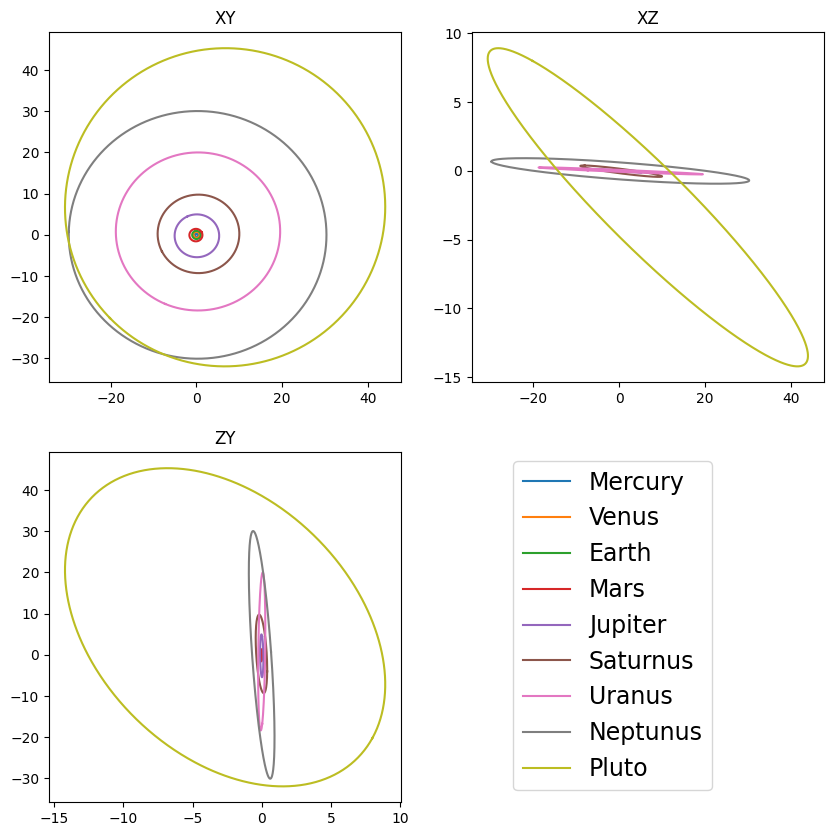

In [24]:
# YOUR CODE HERE
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[1, 1].axis('off')

#Choose the amount of points
numPoints = 1000

E = np.linspace(0, 2*np.pi, numPoints)

orb_elements = {'Mercury': [0.3871, 0.20564, 7.006, 77.46, 48.34, 0.241],
                'Venus': [0.7233, 0.00676, 3.398, 131.77, 76.67, 0.615],
                'Earth': [1.0, 0.01673, 0.0, 102.93, 0.0, 1.0],
                'Mars': [1.5237, 0.09337, 1.852, 336.08, 49.71, 1.881],
                'Jupiter': [5.2025, 0.04854, 1.299, 14.27, 100.29, 11.87],
                'Saturn': [9.5415, 0.05551, 2.492, 92.86, 113.64, 29.47],
                'Uranus': [19.188, 0.04689, 0.773, 172.43, 73.96, 84.05],
                'Neptune': [30.070, 0.00895, 1.770, 46.68, 131.79, 164.9],
                'Pluto': [39.4821, 0.24883, 17.14, 113.76, 110.30, 247.94]} 

#Putting Data in Array
xcoord = []
ycoord = []
zcoord = []
for value in orb_elements.values():
    a, e, incl, peri, node, period = value
    x, y, z = orbitalElements2Cartesian(a, e, incl, peri, node, E)
    axs[0, 0].plot(x, y)
    axs[0, 1].plot(x, z)
    axs[1, 0].plot(z, y)

#----------------------------Plotting the Data-------------------------------

# XY-plane
axs[0, 0].set_title('XY')

# XZ-plane
axs[0, 1].set_title('XZ')

# ZY-plane
axs[1, 0].set_title('ZY')

label = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturnus', 'Uranus', 'Neptunus', 'Pluto']
fig.legend(labels=label, loc='lower right', bbox_to_anchor=(0.8, 0.11), fontsize= 17)


    





    



# Problem 6 - Kepler's third law

Again, we use the data from the orbital elements above. 

* Extract the semi-major axis of all planets (the first element in the list) and store in a `numpy` array `a`.
* Extract the periods of all planets (the last element in the list) and store in a `numpy` array `P`.

In [25]:
# YOUR CODE HERE
a = []
Po = []
for value in orb_elements.values():
    a.append(value[0])
    Po.append(value[5])
a = np.array(a)
Po = np.array(Po)

Use `np.logspace` to create a vector of values that cover the range present in `a`.
Then calculate a vector of periods corresponding to these values according to Kepler's law.

In [26]:
# YOUR CODE HERE
a_vector = np.logspace(-1, 2, 9)
P_vector = a_vector**(3/2)



Now produce a scatter plot of the periods of the planets as a function of semi-major axis, 
you should have these in vectors `a` and `P`, if you followed the instructions above.

Overplot a function describing the relationship between the period and the semi-major axis, 
which is given by Kepler's third law (for semi-major axis in au and period in years): 
$$P^2 = a^3$$
> Use `plt.annotate` for annotating the individual scatter points with the planets' names, but make sure they are readable.
> 
> Consider the best scales for the axes, linear or logithmic?

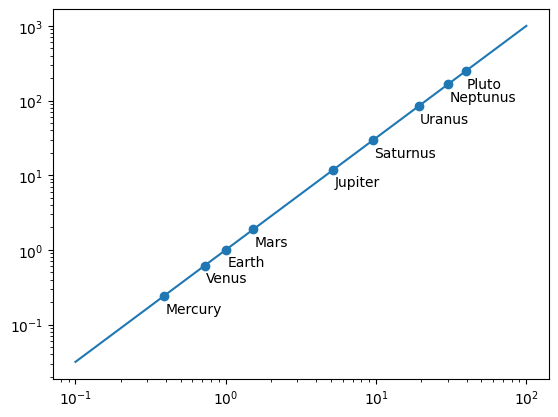

In [27]:
# YOUR CODE HERE
plt.scatter(a, Po)
plt.loglog(a_vector, P_vector)
label = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturnus', 'Uranus', 'Neptunus', 'Pluto']
for i, txt in enumerate(label):
    plt.annotate(txt, (a[i], Po[i]), textcoords='offset points', xytext =(1, -12))

plt.show()